#### 텐서(TENSOR)

In [1]:
import torch
import numpy as np

In [2]:
data = [[1,2], [3,4]] # list임
x_data = torch.tensor(data)

x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
np_array = np.array(data) # array임

x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [4]:
x_ones = torch.ones_like(x_data) # x_data의 속성을 유지
print(f"Ones Tensor : \n {x_ones}")

Ones Tensor : 
 tensor([[1, 1],
        [1, 1]])


In [5]:
x_rand = torch.rand_like(x_data, dtype=torch.float) # x_data의 속성을 덮어씀
print(f"Random Tensor : \n {x_rand}")

Random Tensor : 
 tensor([[0.6007, 0.2573],
        [0.1119, 0.9082]])


In [6]:
# 무작위(random) 또는 상수(constant)값을 사용하기
shape = (2,3)

rand_tensor = torch.randn(shape)
print(f"Random Tensor : \n {rand_tensor}")

ones_tensor = torch.ones(shape)
print(f"Ones Tensor : \n {ones_tensor}")

zeros_tensor = torch.zeros(shape)
print(f"Zeros Tensor : \n {zeros_tensor}")

Random Tensor : 
 tensor([[ 0.9766, -1.7610,  0.7730],
        [-0.7983, -0.3288, -0.6935]])
Ones Tensor : 
 tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros Tensor : 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [7]:
# 텐서의 속성
tensor = torch.rand(3,4)

print(f"Shape of Tensor : {tensor.shape}")
print(f"Datatype of Tensor : {tensor.dtype}")
print(f"Device of Tensor : {tensor.device}")

Shape of Tensor : torch.Size([3, 4])
Datatype of Tensor : torch.float32
Device of Tensor : cpu


In [8]:
# 텐서 연산
tensor = torch.ones(4,4)
tensor[:1] = 0
print(tensor)

tensor([[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [9]:
# 텐서 합치기
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])


In [10]:
# 텐서 곱하기(요소별 곱)
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)}")
print(f"tensor * tensor \n {tensor * tensor}")

tensor.mul(tensor) 
 tensor([[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor * tensor 
 tensor([[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])


In [11]:
# 텐서 곱하기(행렬 곱)
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)}")
print(f"tensor @ tensor \n {tensor @ tensor.T}")

tensor.matmul(tensor.T) 
 tensor([[0., 0., 0., 0.],
        [0., 4., 4., 4.],
        [0., 4., 4., 4.],
        [0., 4., 4., 4.]])
tensor @ tensor 
 tensor([[0., 0., 0., 0.],
        [0., 4., 4., 4.],
        [0., 4., 4., 4.],
        [0., 4., 4., 4.]])


In [12]:
# 바꿔치기(in-place) 연산 : 사용 권장 X
print(tensor, '\n')
tensor.add_(5)
print(tensor)

tensor([[0., 0., 0., 0.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]]) 

tensor([[5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.],
        [6., 6., 6., 6.]])


In [13]:
# 텐서를 numpy 배열로 변환
t = torch.ones(5)
print(f"t : {t}")

n = t.numpy()
print(f"n : {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t : tensor([1., 1., 1., 1., 1.])
n : [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [14]:
# numpy 배열을 텐서로 변환
t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([3., 3., 3., 3., 3.])
n: [3. 3. 3. 3. 3.]


### TORCH.AUTOGRAD : 자동 미분 엔진

<ul>
  <li>순전파(Forward Propagation)
      <ul>순전파 단계에서 신경망은 정답을 맞추기 위해 최선의 추측을 함<br>추측을 하기 위해 입력 데이터를 각 함수들에서 실행함</ul>
  </li>
  <li>역전파(Backward Propagation)
  <ul>신경만은 추측한 값에서 발생한 오류(error)에 비례하여 매개변수들을 적절히 조절함<br>출력으로부터 역방향으로 이동하면서 오류에 대한 함수들의 매개변수들의 미분값(변화도(gradient))을 수집하고,<br>경사하강법을 사용하여 매개변수들을 최적화함</ul>
  </li>
</ul>


In [15]:
import torch
from torchvision.models import resnet18, ResNet18_Weights
model = resnet18(weights = ResNet18_Weights.DEFAULT)

data = torch.rand(1, 3, 64, 64)
labels = torch.rand(1,1000)

In [16]:
prediction = model(data) # 순전파 단게 : 입력 데이터를 모델의 각 층(layer)에 통과시켜 예측값(prediction)을 생성

In [17]:
loss = (prediction - labels).sum() # 모델의 예측값과 정답을 사용하여 오차(error, 손실(loss))를 계산
loss.backward() # 역전파 단게 : 오파 텐서(error tensor)에 backward()를 호출 -> Autograd가 매개변수의 .grad 속성에 모델의 각 매개변수에 대한 변화도를 계산하고 저장

In [18]:
# 옵티마이저 호출 : 학습률 0.1과 모멘텀(0.9)를 갖는 SGD
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [19]:
# .step을 호출하여 경사하강법 시작 -> 옵티마이저는 .grad에 저장된 변화도에 따라 각 매개변수를 조정
optim.step()

In [20]:
import torch

a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)

### 신경망(NEURAL NETWORKS)
<code>torch.nn</code><br>
<code>nn</code>은 모델을 정의하고 미분하는데 <code>autograd</code>를 사용<br>
<code>nn.Module</code>은 계층(layer)과 <code>output</code>을 반환하는 <code>forward(input)</code>메서드를 포함하고 있음

In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 입력 이미지 채널 1개, 출력 채널 6개, 5x5의 정사각 컨볼루션 행렬
        # 컨볼루션 커널 정의
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # 아핀(affine) 연산: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5은 이미지 차원에 해당
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, input):
        # 합성곱(Convolution) 레이어 c1: 입력 이미지 채널 1, 출력 채널 6,
        # 5x5 정사각 합성곱, 활성 함수로 RELU 사용 및 (N, 6, 28, 28)의 크기를
        # 갖는 Tensor를 출력 (N은 배치 크기)
        c1 = F.relu(self.conv1(input))
        # 서브샘플링(Subsampling) 레이어 s2: 2x2 격자, 순전히 기능적인 레이어로,
        # 이 레이어는 어떠한 매개변수도 가지지 않고 (N, 6, 14, 14) Tensor를 출력
        s2 = F.max_pool2d(c1, (2, 2))
        # 합성곱(Convolution) 레이어 c3: 입력 채널 6, 출력 채널 16,
        # 5x5 정사각 합성곱, 활성 함수로 RELU 사용 및 (N, 16, 10, 10)의 크기를
        # 갖는 Tensor를 출력
        c3 = F.relu(self.conv2(s2))
        # 서브샘플링(Subsampling) 레이어 s4: 2x2 격자, 순전히 기능적인 레이어로,
        # 이 레이어는 어떠한 매개변수도 가지지 않고 (N, 16, 5, 5) Tensor를 출력
        s4 = F.max_pool2d(c3, 2)
        # 평탄화(flatten) 연산: 순전히 기능적으로 동작하며, (N, 400) Tensor를 출력
        s4 = torch.flatten(s4, 1)
        # 완전히 연결된 레이어 f5: (N, 400) Tensor를 입력으로 받아서
        # (N, 120) Tensor를 출력하며, 활성 함수로 RELU 사용
        f5 = F.relu(self.fc1(s4))
        # 완전히 연결된 레이어 f6: (N, 120) Tensor를 입력으로 받아서
        # (N, 84) Tensor를 출력하며, 활성 함수로 RELU 사용
        f6 = F.relu(self.fc2(f5))
        # 가우시안 레이어 출력: (N, 84) Tensor를 입력으로 받아서
        # (N, 10) Tensor를 출력
        output = self.fc3(f6)
        return output

    def forward(self, x):
        # (2, 2) 크기 윈도우에 대해 맥스 풀링(max pooling)
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # 크기가 제곱수라면, 하나의 숫자만을 특정(specify)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # 배치 차원을 제외한 모든 차원을 하나로 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [23]:
# 모델의 학습 가능한 매개변수들으 net.parameters()에 의해 반환
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1의 .weight

10
torch.Size([6, 1, 5, 5])


In [24]:
input = torch.randn(1, 1, 32, 32) # 임의의 32x32 입력값을 넣어봄
out = net(input)
print(out)

tensor([[ 0.0259,  0.0197,  0.1437, -0.0559,  0.0024,  0.0742,  0.0850,  0.0459,
          0.0349,  0.0985]], grad_fn=<AddmmBackward0>)


In [25]:
# 모든 매개변수의 변화도 버퍼(gradient buffer)를 0으로 설정하고, 무작위 값으로 역전파
net.zero_grad()
out.backward(torch.randn(1, 10))

#### 손실 함수(Loss Function)
(output, target)을 한 쌍의 입력으로 받아, 출력(output)이 정답(target)으로부터 얼마나 멀리 떨어져 있는지 추정하는 값을 계산<br>
- nn.MSEloss : 평균제곱오차(MSE) 계산

In [26]:
output = net(input)
target= torch.randn(10) # 예시를 위한 임의의 정답
target = target.view(1, -1) # 출력과 같은 shape로 만듦
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9991, grad_fn=<MseLossBackward0>)


In [27]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

#### 역전파(Backprop)
오차(error)를 역전파하기 위해서는 loss.backward()만 해주면 됨<br>
기존에 계산된 변화도의 값을 누적시키고 싶지 않다면 기존에 계산된 변화도를 0으로 만드는 작업이 필요

In [28]:
net.zero_grad() # 모든 매개변수의 변화도 버퍼를 0으로 만듦

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad, "\n")

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
None 

conv1.bias.grad after backward
tensor([ 0.0079, -0.0030,  0.0035,  0.0175, -0.0025, -0.0064])


#### 가중치 갱신
실제로 많이 사용되는 가장 단순한 갱신 규칙은 확률적 경사하강법(SGD)

In [29]:
# 새로운 가중치 = 가중치 - 학습률 * 변화도
weight = weight - learning_rate * gradient

NameError: name 'weight' is not defined

In [30]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [31]:
import torch.optim as optim

# Optimizer를 생성합니다.
optimizer = optim.SGD(net.parameters(), lr=0.01)

# 학습 과정(training loop)은 다음과 같습니다:
optimizer.zero_grad()   # 변화도 버퍼를 0으로
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # 업데이트 진행

### 분류기 학습하기
- 이미지 : Pillow, OpenCV 패키지
- 오디오 : SciPy, LibROSA
- 텍스트 : Python, Cython, NLTK, SpaCY
- 영상 : torchvision(데이터 로더 포함)

In [32]:
import torch
import torchvision
import torchvision.transforms as transforms

<h5>이미지 분류기 학습하기</h5>

<ol><li>torchvision 을 사용하여 CIFAR10의 학습용 / 시험용 데이터셋을 불러오고, 정규화(nomarlizing)합니다.</li>

<li>합성곱 신경망(Convolution Neural Network)을 정의합니다.</li>

<li>손실 함수를 정의합니다.</li>

<li>학습용 데이터를 사용하여 신경망을 학습합니다.</li>

<li>시험용 데이터를 사용하여 신경망을 검사합니다.</li></ol>

In [33]:
# 1. CIFAR10을 불러오고 정규화하기
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


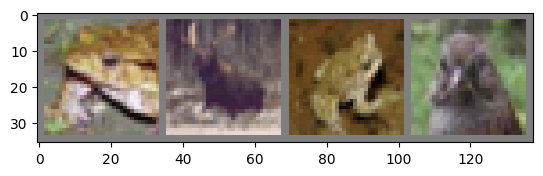

frog  deer  frog  bird 


In [34]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 학습용 이미지를 무작위로 가져오기
dataiter = iter(trainloader)
images, labels = next(dataiter)

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))
# 정답(label) 출력
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [35]:
# 2. 합성곱 신경망(Convolution Neural Network) 정의하기
# 이전의 신경망 섹션에서 신경망을 복사한 후, (기존에 1채널 이미지만 처리하도록 정의된 것을) 3채널 이미지를 처리할 수 있도록 수정
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # 배치를 제외한 모든 차원을 평탄화(flatten)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [36]:
# 3. 손실 함수와 Optimizer 정의하기
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [37]:
# 4. 신경망 학습하기
for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.199
[1,  4000] loss: 1.866
[1,  6000] loss: 1.671
[1,  8000] loss: 1.569
[1, 10000] loss: 1.497
[1, 12000] loss: 1.479
[2,  2000] loss: 1.391
[2,  4000] loss: 1.356
[2,  6000] loss: 1.347
[2,  8000] loss: 1.315
[2, 10000] loss: 1.303
[2, 12000] loss: 1.283
Finished Training


In [38]:
# 학습한 모델 저장
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

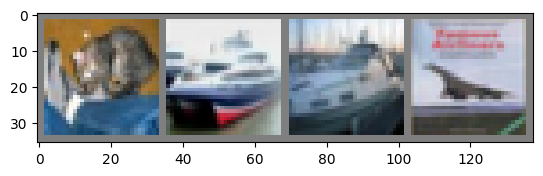

GroundTruth:  cat   ship  ship  plane


In [39]:
# 5. 시험용 데이터로 신경망 검사하기
# 시험용 데이터 확인
dataiter = iter(testloader)
images, labels = next(dataiter)

# 이미지를 출력합니다.
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [40]:
# 저장했던 모델 호출
net = Net()
net.load_state_dict(torch.load(PATH))

outputs = net(images) # 예제들을 신경망이 어떻게 예측했는지 확인

C:\Users\cho03\AppData\Local\Temp\ipykernel_19284\525625151.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(PATH))


In [41]:
# 출력은 10개 분류 각각에 대한 값으로 나타남
# 어떤 분류에 대해서 더 높은 값이 나타난다는 것은, 신경망이 그 이미지가 해당 분류에 더 가깝다고 생각한다는 것
# -> 가장 높은 값을 갖는 인덱스(index)를 뽑아봄

_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  plane ship 


In [42]:
# 전체 데이터셋에 대해 어떻게 동작하는지 확인
correct = 0
total = 0
# 학습 중이 아니므로, 출력에 대한 변화도를 계산할 필요가 없습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # 신경망에 이미지를 통과시켜 출력을 계산합니다
        outputs = net(images)
        # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 56 %


In [43]:
#  어떤 것들을 더 잘 분류하고, 어떤 것들을 더 못했는지 확인인

# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# 변화도는 여전히 필요하지 않습니다
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 67.1 %
Accuracy for class: car   is 69.1 %
Accuracy for class: bird  is 36.4 %
Accuracy for class: cat   is 40.2 %
Accuracy for class: deer  is 39.8 %
Accuracy for class: dog   is 45.9 %
Accuracy for class: frog  is 68.1 %
Accuracy for class: horse is 67.6 %
Accuracy for class: ship  is 66.8 %
Accuracy for class: truck is 61.2 %
